In [1]:
sale <- read.csv('marketing_sales.csv')
head(sale)

X,social,tele,newspaper,turnover
1,200.92,142.17,145.41,943.0419
2,156.26,129.85,62.70,856.2597
3,124.38,187.57,140.04,964.9689
4,157.69,187.48,143.94,1017.4412
5,158.23,222.41,116.04,1115.2990
6,132.48,181.55,119.84,932.3739


In [ ]:
## Explain some metric:
# Turnover: the revenue that a company get from customer, by various method of sales...
#Social, telte, newspaper: some of sale method
#Purpose: Throughout 3 different sale method, what's method is efficent to Turnover metric?

In [ ]:
# Data information:
# By the records and its fields, due to the factor of binary decision or time-series is not exists 
# => we can use of linear/non-linear regression 

In [2]:
dim(sale)

[1] 200   5

In [4]:
#Define correlation:
cor(sale, method='pearson')

,X,social,tele,newspaper,turnover
X,1.00000000,-0.04977015,-0.03918551,-0.177473371,-0.047532656
social,-0.04977015,1.00000000,0.08401121,0.047806059,0.487083735
tele,-0.03918551,0.08401121,1.00000000,-0.039579633,0.903092760
newspaper,-0.17747337,0.04780606,-0.03957963,1.000000000,-0.002900308
turnover,-0.04753266,0.48708374,0.90309276,-0.002900308,1.000000000


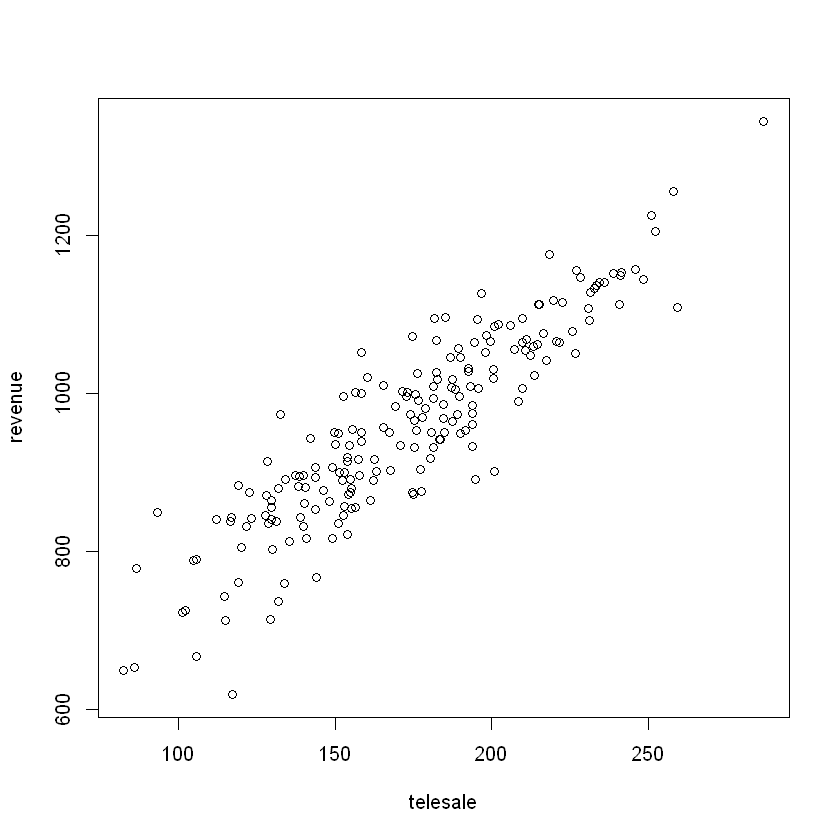

In [5]:
revenue <- sale$turnover
social <- sale$social
tele <- sale$tele
ordi <- sale$newspaper
plot(tele, revenue, xlab='telesale', ylab='revenue')

In [ ]:
# By the scatter plot, revenue have trend to increasing by goods sold through telesale => We can check the model for it

In [6]:
model1 <- lm(revenue~tele, data=sale)
summary(model1)


Call:
lm(formula = revenue ~ tele, data = sale)

Residuals:
     Min       1Q   Median       3Q      Max 
-181.504  -32.874    2.386   34.283  134.180 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 467.45415   17.01935   27.47   <2e-16 ***
tele          2.83909    0.09594   29.59   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 52.82 on 198 degrees of freedom
Multiple R-squared:  0.8156,	Adjusted R-squared:  0.8146 
F-statistic: 875.6 on 1 and 198 DF,  p-value: < 2.2e-16


In [ ]:
#Let's explain this result:
# Median is get over 0 and greater than 2 => We should check this model by mean of variance condition
# 'tele' variable have P-value less than 0.05 => this variable have statistic signfinication
# Overall p-value of model is less than 0.05 => this model have statistic signification
# As expected, the revenue is positive linear relation with 'tele' by 2,83 times. It mean that for each goods sold by telesale
# the revenue turn back could increase 2.83 units (revenue)
# this model can explain 81% data, it such that 81% revenue back to company could be consider by telesale

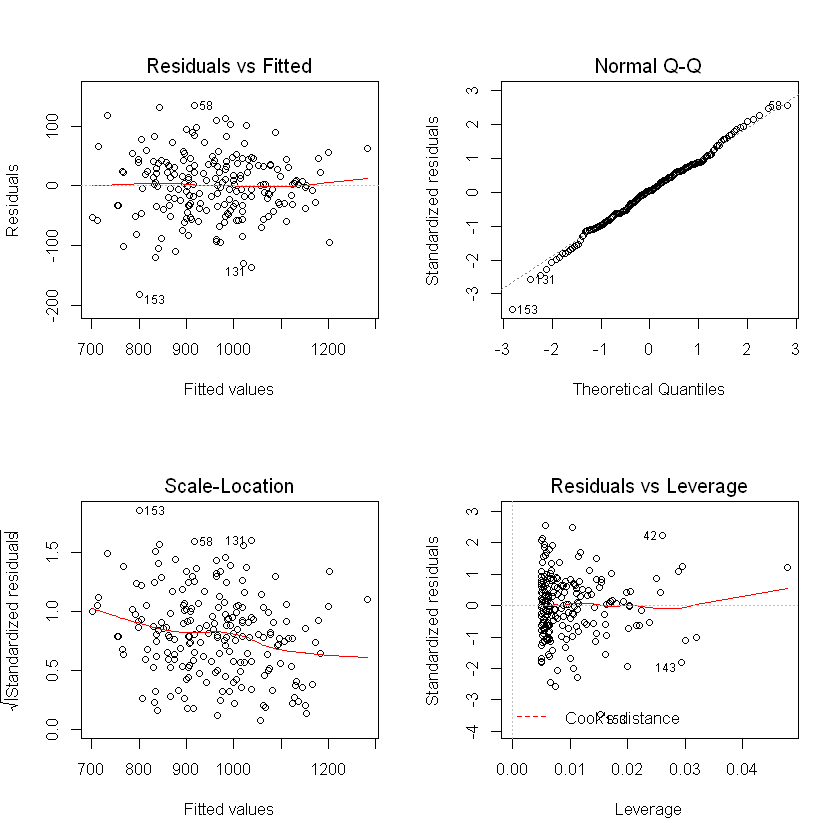

In [7]:
par(mfrow=c(2,2))
plot(model1)

In [ ]:
#By the plot result:
# Residual-Fitted: The red line is closely to match with y = 0 => have sign of linear relation 
# The Q-Q plot also tell us the residual distribution could be Normal, because it gather on one line
# By the Leverage plot, we can consider that in this model, we have not any point consider as outliers
# By the Scale-Location plot (check for condition of constant variance), we can see:
#1. The red line is not a perfect horizontal line => we will check variance constant by hypothesis test below
#2. The fitted value gather not much as equal for all range in fitted value => back to 1.

In [9]:
library(car)
ncvTest(model1)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 6.768474, Df = 1, p = 0.0092782

In [ ]:
#By the check: p-value <0.05 => this model exactly have vary variance => we would try other model
# Before that, we will check for residual = 0 to see if this model totally can't use

In [10]:
res<- residuals(model1)
t.test(res, mu=0)


	One Sample t-test

data:  res
t = -1.9372e-16, df = 199, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -7.346033  7.346033
sample estimates:
   mean of x 
-7.21645e-16 


In [ ]:
# Even thought this model pass other condition but it have varies variance => could be lead to systemize changed error
# We will try to use other model

In [11]:
model2<- lm(revenue~social+tele, data=sale)
summary(model2)


Call:
lm(formula = revenue ~ social + tele, data = sale)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.589  -9.631   0.468   9.658  38.351 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 207.06397    7.13046   29.04   <2e-16 ***
social        1.86966    0.03836   48.74   <2e-16 ***
tele          2.72971    0.02671  102.18   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.65 on 197 degrees of freedom
Multiple R-squared:  0.9859,	Adjusted R-squared:  0.9857 
F-statistic:  6875 on 2 and 197 DF,  p-value: < 2.2e-16


In [ ]:
# By the glance, we can see the median of overall model is closer to 0, and
# P-value for all variable is less than 0.05 => this model overall have statistic signification
# This model could explain up to 98% dataset, it mean that for revenue got back to company, 98% of it will come by `tele` & `social` method
# For each goods sold, revenue will up 1.86 times by social and 2.79 times by tele
# Because this is linear regression with multi-variable, we should check for the multicollinear events

In [12]:
car::vif(model2)

social     tele 
1.007108 1.007108

In [ ]:
# Condition of multicollinear is done, this model could be use to check other condition

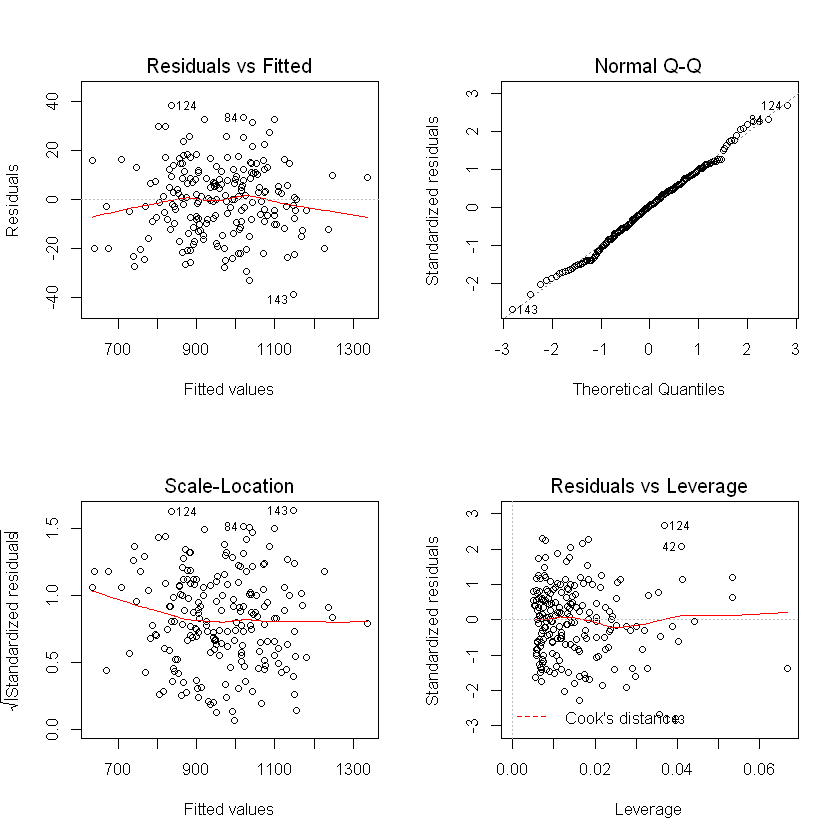

In [13]:
par(mfrow=c(2,2))
plot(model2)

In [ ]:
#We can see the improvement by add one more variable in regression model
# Beside of the Residuals-Fitted a little not horizontal, Q-Q plot still show us sign of normal distribution for residual of this model
# Scale-Location graph show us the improvement, when the red line is somewhat is horizontal, 
#and the spread fitted value gather around somewhat not vary by function of fitted value => we still check constant variance to get clearly
# By the Leverage plot, there's no signification outliers in our model

In [14]:
res2 <- residuals(model2)
t.test(res2, mu=0)


	One Sample t-test

data:  res2
t = 1.189e-15, df = 199, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -2.032987  2.032987
sample estimates:
   mean of x 
1.225825e-15 


In [15]:
ncvTest(model2) #(p-value >0.05 => we can't reject null hypothesis, and the variance is constant)

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 0.2402166, Df = 1, p = 0.62405

In [16]:
shapiro.test(res2)


	Shapiro-Wilk normality test

data:  res2
W = 0.9945, p-value = 0.676


In [ ]:
#All of remain test condition have satisfied, this model could be use to predict

In [ ]:
# So, the final model could be
# Turnover = 1.86966*Social + 2.72971*Tele + 207.06397
# We could check what is the important factor in this model, and build a sample test to see what happend

In [20]:
caret::varImp(model2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


,Overall
social,48.7359
tele,102.1822


In [21]:
new_data<- data.frame(social=500, tele=200)
predict(model2, new_data, type='response')

1 
1687.834

In [22]:
new_data2<- data.frame(social=500, tele=400)
predict(model2, new_data2, type='response')

1 
2233.776

In [ ]:
#So, we can see that, both Social and Telesale is the method that bring revenue back to company
# But the telesale method could be concetrated more while it bring to company much more revenue than Social, but overall, we will keep both
# The newspaper method could be stopped, due to the relation of revenue to newspaper method is negative and not much clear to admit